###Praktikum 1 - Klasterisasi Data Liniear

####Langkah 1 - Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

####Langkah 2 - Load dan Inspeksi Data

In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Inspeksi profile data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


####Langkah 3 - Seleksi Fitur

In [ ]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

Cek data fitur

In [ ]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


####Langkah 4 - Plotting

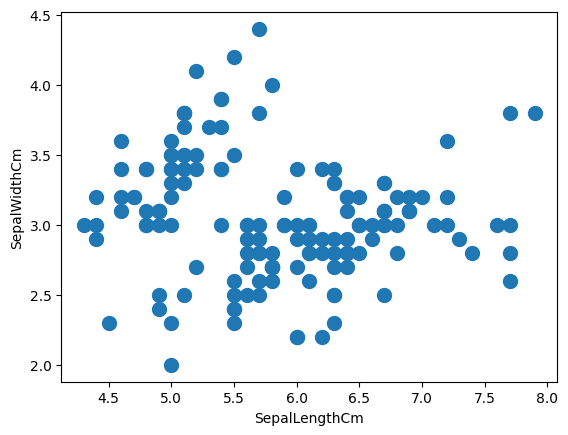

In [ ]:
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

####Langkah 5 - Membuat model K-Means

In [ ]:
from sklearn.cluster import KMeans

cl_kmeans = KMeans(n_clusters=2)

y_kmeans = cl_kmeans.fit_predict(X)

Pengecekkan hasil klasterisasi dengan scatterplot.

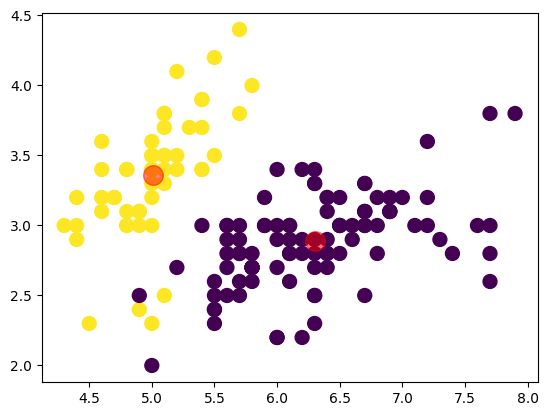

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

####Langkah 6 - Evaluasi Model

In [ ]:
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


####Langkah 7 - Menentukan k terbaik dengan Elbow Method

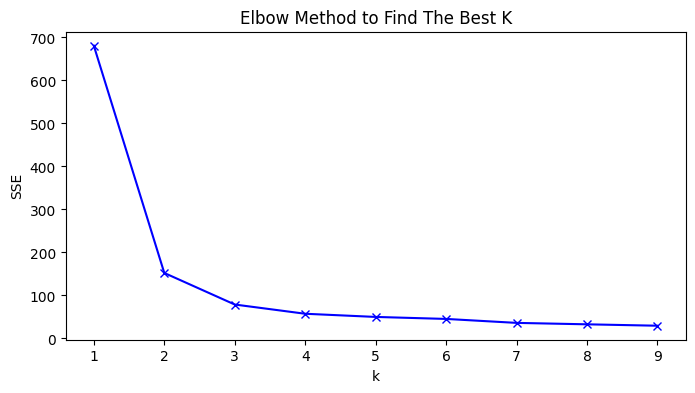

In [ ]:
sse = []

K = range(1,10)

for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(X)
  sse.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

###Praktikum 2 - Klasterisasi Data Non-Liniear

####Langkah 0 - Import Library

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

####Langkah 1 - Membuat Dataset Sintentis

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

Plotting data untuk melihat hasil dataset yang telah dibuat.

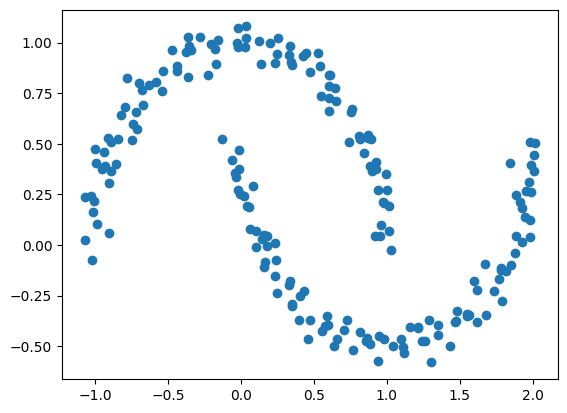

In [ ]:
plt.scatter(X[:, 0], X[:, 1])

####Langkah 2 - Klasterisasi dengan K-Means

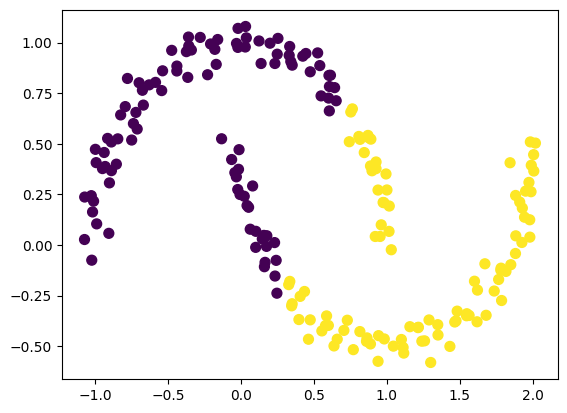

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, random_state=0)
cluster = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster, s=50, cmap='viridis')

Evaluasi dengan *silhouette_score*

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster))

0.49215648268306905


Nilai ini menunjukkan bahwa data tidak terklasterisasi dengan cukup baik. Karena nilai tidak mendekati 1.

####Langkah 3 - Klasterisasi dengan DBSCAN

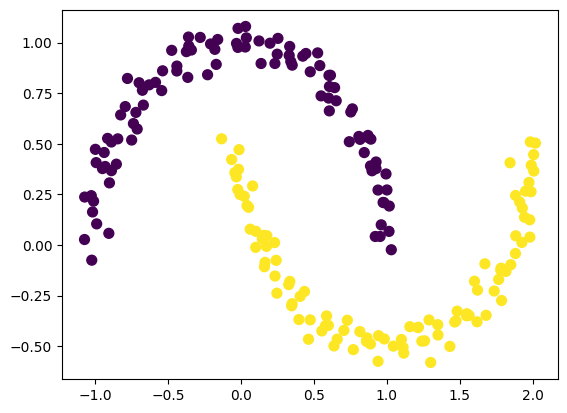

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=2)
cluster_db = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=50, cmap='viridis')

Evaluasi dengan *silhouette_score*

In [ ]:
print(silhouette_score(X, cluster_db))

0.32585318950197517


Hasil silhouette score menunjukkan hasil yang tidak optimal. Padahal cluster terbentuk dengan baik secara visual. Mengapa demikian? Silhouette coefficient berasumsi cluster dapat terpisah dengan baik dalam bentuk linier, sehingga jika bentuknya distribusi data acak, evaluasi silhouette coefficient tidak dapat bekerja dengan baik. Lalu evaluasi apa yang bisa kita lakukan? Secara sederhana,

 - Prosentase data noise

 - Inspeksi visual

Secara metric dapat menggunakan DBI. Davies-Bouldin Index (DBI) digunakan sebagai metrik evaluasi tambahan karena memberikan perspektif yang berbeda dari silhouette score. Jika silhouette score menilai kualitas clustering berdasarkan kedekatan titik dalam satu cluster dan jarak antar cluster, maka DBI mengukur rasio antara tingkat kerapatan (compactness) suatu cluster dengan jarak pemisahan (separation) antar cluster. Nilai DBI selalu positif, di mana semakin kecil nilainya berarti semakin baik kualitas clustering karena cluster semakin rapat dan semakin jauh dari cluster lain. Dengan demikian, DBI dapat melengkapi evaluasi menggunakan silhouette score, terutama pada dataset dengan bentuk cluster yang tidak bulat (non-spherical) sehingga hasil penilaian lebih komprehensif.

In [ ]:
from sklearn.metrics import davies_bouldin_score

db = davies_bouldin_score(X, cluster_db)

print(f"Davies-Bouldin Index: {db}")

Davies-Bouldin Index: 1.1622685374061352


###Praktikum 3 - Klasterisasi Pada Kompresi Citra

####Langkah 0 - Import Library

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

####Langkah 1 - Load Data Citra

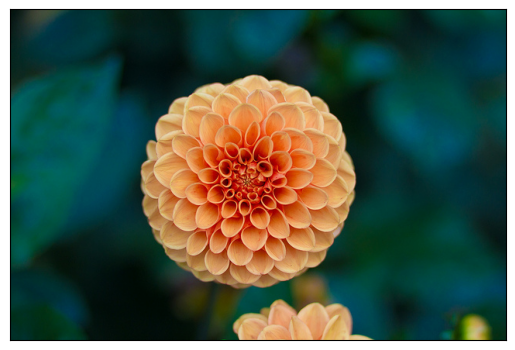

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

####Langkah 2 - Preprocessing

In [ ]:
print(flower.shape)

data = flower / 255.0

data = data.reshape(427 * 640, 3) # Ubah menjadi 1D

print(data.shape)

(427, 640, 3)
(273280, 3)


####Langkah 3 - Cek sebaran warna

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
  if colors is None:
    colors = data

  rng = np.random.RandomState(0)
  i = rng.permutation(data.shape[0])[:N]
  colors = colors[i]
  R, G, B = data[i].T

  fig, ax = plt.subplots(1, 2, figsize=(16,6))
  ax[0].scatter(R, G, color=colors, marker='.')
  ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

  ax[1].scatter(R, B, color=colors, marker='.')
  ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

  fig.suptitle(title, size=20)

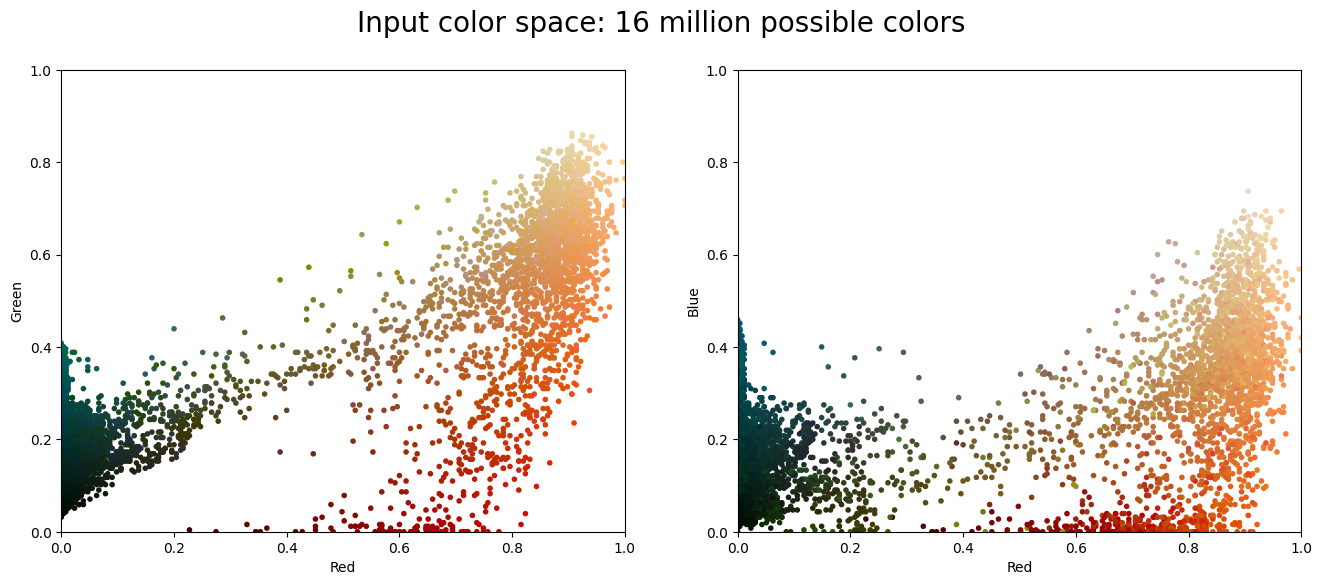

In [ ]:
plot_pixels(data, title="Input color space: 16 million possible colors")

####Langkah 4 - Klasterisasi Warna

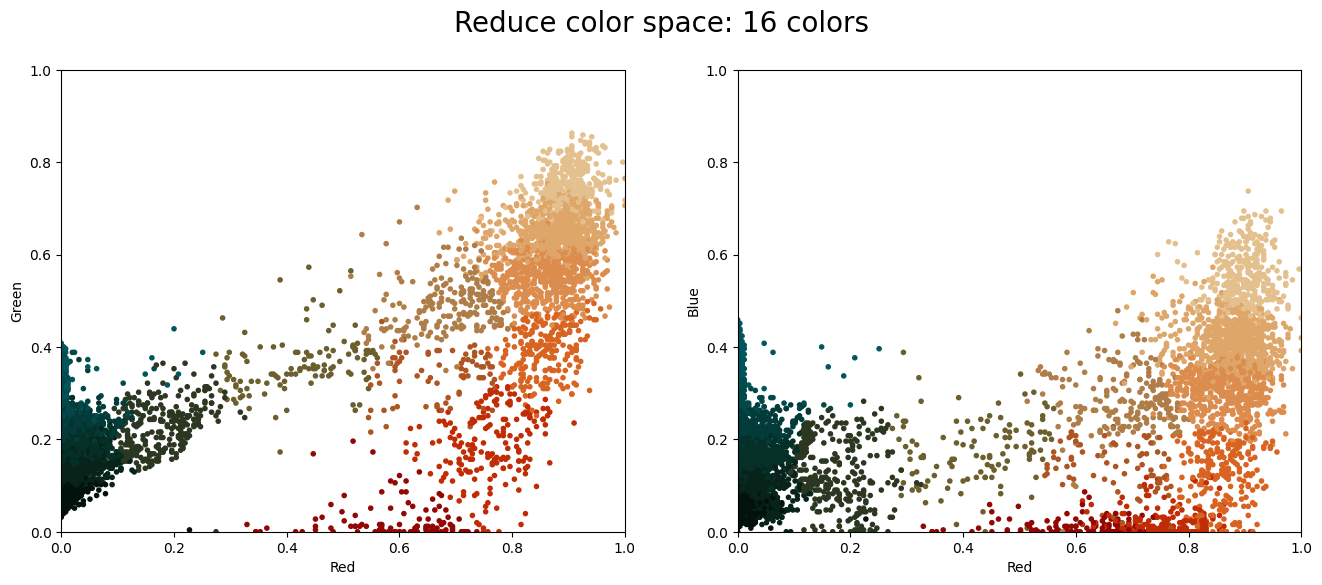

In [ ]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduce color space: 16 colors")

Hasil perbandingan warna citra sebelum dan sesudah kompresi.

Text(0.5, 1.0, '16-color Image')

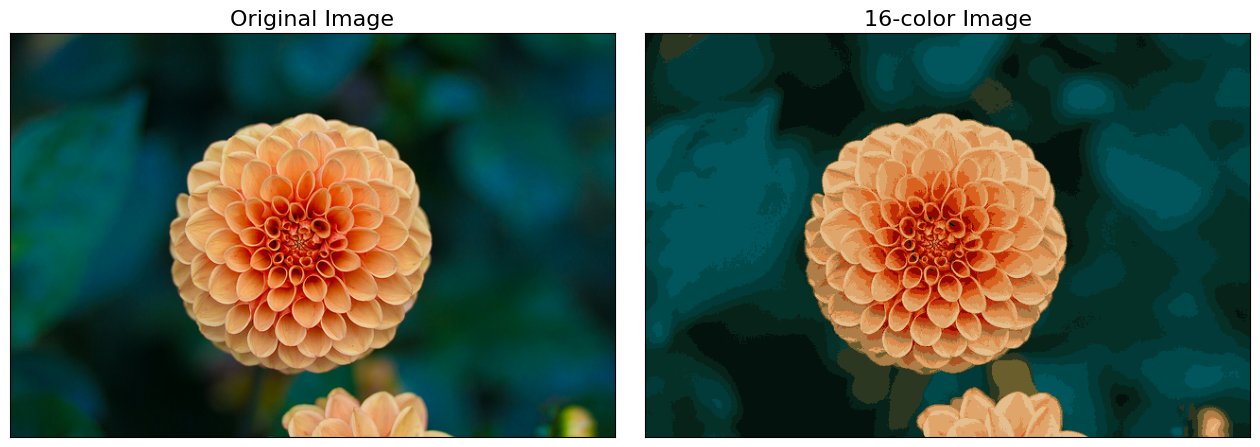

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                        subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16)

###Tugas Praktikum

- Buatlah scatterplot berdasarkan dataset menggunakan dua variabel, yaitu `Avg_Credit_Limit` dan `Total_credit_card.` Apakah sebaran data dapat dikatakan linier?

- Buatlah model klasterisasi dengan menggunakan model K-Means. Tentukan jumlah **k** yang terbaik dengan menggunakan **elbow method**. Lengkapi analisis Anda dengan *linechart* dan hasil analisis mengapa Anda memilih nilai tersebut.

- Gambarkan hasil klasterisasi dengan model K-Means dengan menggunakan scatterplot.

- Buatlah model klasterisasi dengan menggunakan DBSCAN **dengan seluruh variabel yang dapat digunakan.**

- Tentukan jumlah **k** yang terbaik dengan menggunakan elbow ***method***. Lengkapi analisis Anda dengan *linechart* dan hasil analisis mengapa Anda memilih nilai tersebut.

- Tentukan nilai silhouette score dan DBI dari model DBSCAN.

####Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

####Load Data dan Inspeksi

In [ ]:
df = pd.read_csv('CC_Customer_Dataset.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


####Slicing Dataframe

In [ ]:
X = df.drop(columns=['Sl_No', 'Customer Key'])
X.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.head())

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          1.740187           -1.249225          -0.860451   
1          0.410293           -0.787585          -1.473731   
2          0.410293            1.058973          -0.860451   
3         -0.121665            0.135694          -0.860451   
4          1.740187            0.597334          -1.473731   

   Total_visits_online  Total_calls_made  
0            -0.547490         -1.251537  
1             2.520519          1.891859  
2             0.134290          0.145528  
3            -0.547490          0.145528  
4             3.202298         -0.203739  


####Plotting

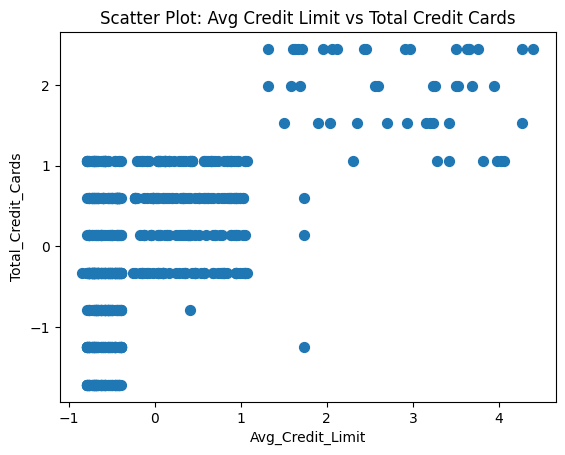

In [ ]:
plt.scatter(X_scaled['Avg_Credit_Limit'], X_scaled['Total_Credit_Cards'], s=50)
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.title('Scatter Plot: Avg Credit Limit vs Total Credit Cards')
plt.show()

Buatlah scatterplot berdasarkan dataset menggunakan dua variabel, yaitu Avg_Credit_Limit dan Total_credit_card. Apakah sebaran data dapat dikatakan linier?

**JAWAB:**

Dari hasil scatterplot yang didapatkan, terlihat bahwasannya penyebaran data `avg credit limit` dan `total credit cards` tidak ada garis lurus yang menghubungkan liniear.

####Model K-Means

Buatlah model klasterisasi dengan menggunakan model K-Means.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

y_kmeans = kmeans.fit_predict(X_scaled)

In [ ]:
print(f'Nilai SSE: {kmeans.inertia_}')

Nilai SSE: 933.0437490000528


Tentukan jumlah k yang terbaik dengan menggunakan elbow method. Lengkapi analisis Anda dengan linechart dan hasil analisis mengapa Anda memilih nilai tersebut.

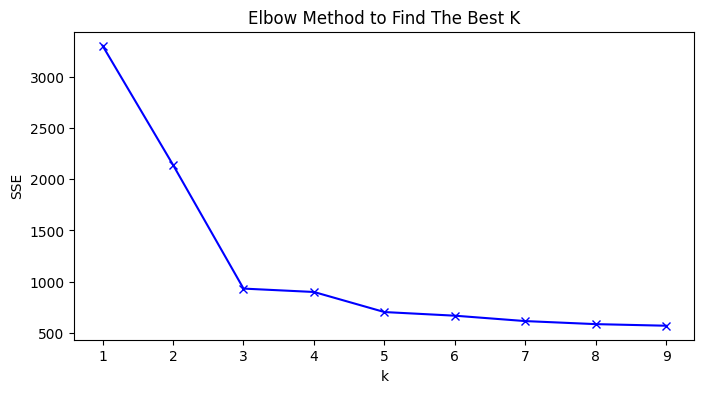

In [ ]:
sse = []

K = range(1, 10)

for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(X_scaled)
  sse.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

Berdasarkan elbow method pada linechart, jumlah cluster terbaik adalah k=3, karena pada titik ini grafik membentuk siku dan menambahkan cluster lebih banyak tidak memberikan peningkatan yang signifikan.

####Gambarkan hasil klasterisasi dengan model K-Means dengan menggunakan scatterplot

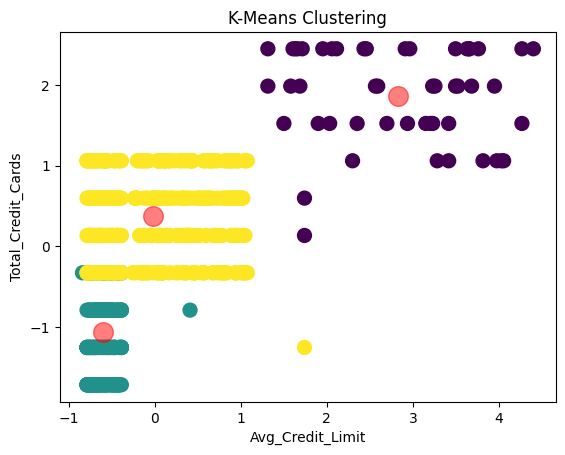

In [ ]:
plt.scatter(X_scaled['Avg_Credit_Limit'], X_scaled['Total_Credit_Cards'], s=100, c=y_kmeans, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.title('K-Means Clustering')
plt.show()


####Buatlah model klasterisasi dengan menggunakan DBSCAN dengan seluruh variabel yang dapat digunakan.

In [ ]:
from sklearn.cluster import DBSCAN

X = df[['Avg_Credit_Limit', 'Total_Credit_Cards',
        'Total_visits_bank', 'Total_visits_online',
        'Total_calls_made']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

df['Cluster'] = clusters

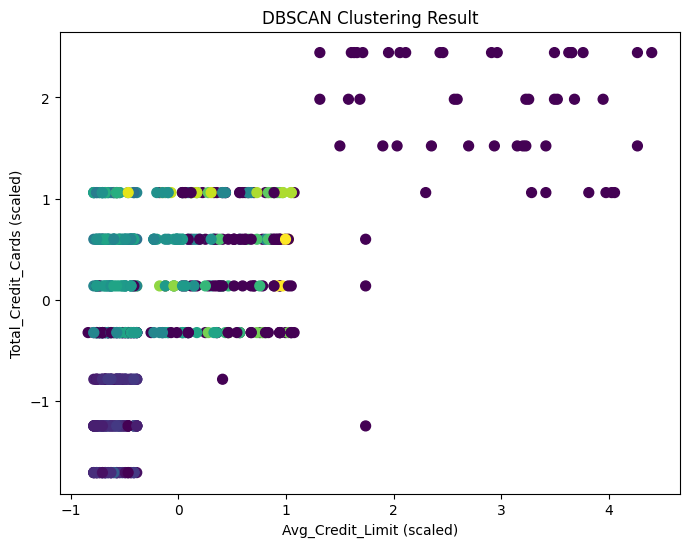

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='viridis', s=50)
plt.xlabel("Avg_Credit_Limit (scaled)")
plt.ylabel("Total_Credit_Cards (scaled)")
plt.title("DBSCAN Clustering Result")
plt.show()


####Tentukan jumlah k yang terbaik dengan menggunakan elbow method. Lengkapi analisis Anda dengan linechart dan hasil analisis mengapa Anda memilih nilai tersebut.

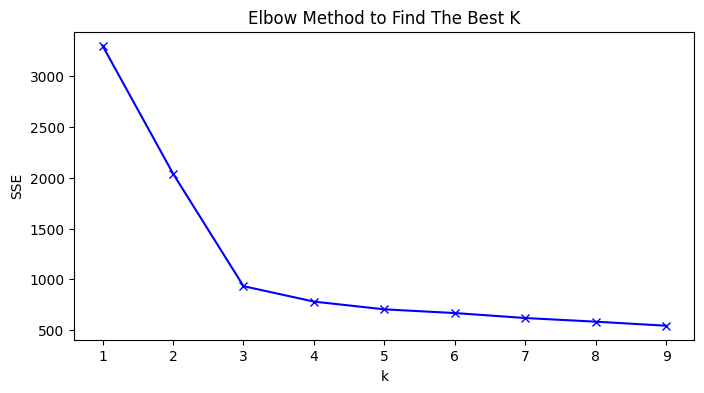

In [ ]:
sse = []

K = range(1, 10)

for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(X_scaled)
  sse.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

Analisa: Sama seperti pada line chart sebelumnya, jumlah k terbaik berdasarkan Elbow Method adalah 3. Namun, terdapat perbedaan pola setelah titik k=3. Pada line chart sebelumnya, setelah k=3 penurunan SSE masih cukup signifikan, sedangkan pada line chart kali ini penurunannya relatif kecil (hanya tipis).

####Tentukan nilai silhouette score dan DBI dari model DBSCAN.

Sihlouette Score

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X_scaled, cluster_db))

-0.1403089162935231


DBI

In [ ]:
from sklearn.metrics import davies_bouldin_score

db = davies_bouldin_score(X_scaled, cluster_db)

print(f"Davies-Bouldin Index: {db}")

Davies-Bouldin Index: 1.8592090191764785
